In [86]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [87]:
import zipfile
zf = zipfile.ZipFile("datasets.zip", "r")
zf.extractall()

In [88]:
my_data_dir = 'datasets/chest_Xray'

In [89]:
test_path = my_data_dir + '/test/'

In [90]:
train_path = my_data_dir + '/train/'

In [91]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'NORMAL'):
    
    img = imread(test_path+'NORMAL'+'/'+image_filename)
    d1,d2 = img.shape
    dim1.append(d1)
    dim2.append(d2)

/home/tathieu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


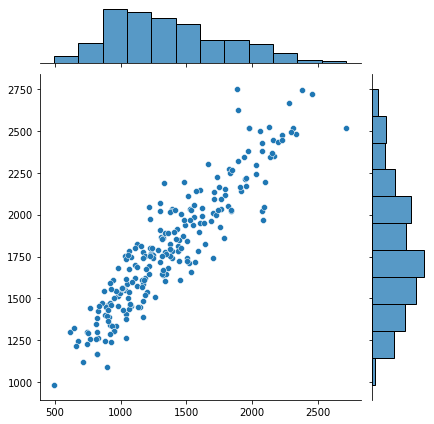

In [92]:
sns.jointplot(dim1,dim2)

In [93]:
img_dims = 139
img_dims2 = 180
batch_size = 60

In [94]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [95]:
image_gen_train = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)

image_gen_test = ImageDataGenerator(rescale = 1./255)

In [96]:
image_gen_train.flow_from_directory(directory=train_path,
target_size = (130, 130),
batch_size = 60,
class_mode = 'binary')

image_gen_test.flow_from_directory(directory=test_path,
target_size = (130, 130),
batch_size = 60,
class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [97]:
# image_gen.flow_from_directory(test_path)

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [99]:
image_shape = (img_dims,img_dims2,3)

In [100]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())


model.add(Dense(units=128, activation='relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))

model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [101]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 137, 178, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 68, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 66, 87, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 33, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 31, 41, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 20, 128)     

In [102]:
from tensorflow.keras.callbacks import EarlyStopping

In [103]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [104]:
train_image_gen = image_gen_train.flow_from_directory(directory=train_path,
target_size = (img_dims, img_dims2),
batch_size = batch_size,
class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [105]:
test_image_gen = image_gen_test.flow_from_directory(directory=test_path,
target_size = (img_dims, img_dims2),
batch_size = batch_size,
class_mode = 'binary')

Found 624 images belonging to 2 classes.


In [106]:
model.fit(train_image_gen,epochs=20, validation_data=test_image_gen, callbacks=[early_stop])

Epoch 1/20
87/87 [==============================] - 175s 2s/step - loss: 0.5340 - accuracy: 0.7575 - val_loss: 0.3863 - val_accuracy: 0.8317
Epoch 2/20
87/87 [==============================] - 174s 2s/step - loss: 0.3006 - accuracy: 0.8629 - val_loss: 0.5537 - val_accuracy: 0.7965
Epoch 3/20
87/87 [==============================] - 163s 2s/step - loss: 0.2594 - accuracy: 0.8880 - val_loss: 0.3583 - val_accuracy: 0.8590
Epoch 4/20
87/87 [==============================] - 169s 2s/step - loss: 0.2277 - accuracy: 0.9078 - val_loss: 0.3985 - val_accuracy: 0.8734
Epoch 5/20
87/87 [==============================] - 161s 2s/step - loss: 0.1852 - accuracy: 0.9287 - val_loss: 0.3464 - val_accuracy: 0.8878
Epoch 6/20
87/87 [==============================] - 169s 2s/step - loss: 0.1736 - accuracy: 0.9323 - val_loss: 0.2632 - val_accuracy: 0.9151
Epoch 7/20
87/87 [==============================] - 174s 2s/step - loss: 0.1879 - accuracy: 0.9300 - val_loss: 0.2692 - val_accuracy: 0.9087
Epoch 8/20
87

In [107]:
from tensorflow.keras.models import load_model
model.save('pneumonia_detector')

INFO:tensorflow:Assets written to: pneumonia_detector/assets


In [108]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

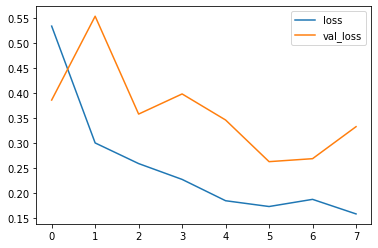

In [109]:
losses[['loss','val_loss']].plot()

In [110]:
model.metrics_names

['loss', 'accuracy']

In [111]:
    model.evaluate(test_image_gen)

11/11 [==============================] - 4s 394ms/step - loss: 0.3331 - accuracy: 0.8974


[0.3330923020839691, 0.8974359035491943]

In [112]:
pred_probabilities = model.predict(test_image_gen)

In [113]:
pred_probabilities

array([[9.99939919e-01],
       [7.57068157e-01],
       [1.88048184e-02],
       [9.99637842e-01],
       [2.38631248e-01],
       [9.99997139e-01],
       [9.99172509e-01],
       [9.89823878e-01],
       [9.86594141e-01],
       [9.99999404e-01],
       [9.99998629e-01],
       [9.99513745e-01],
       [9.99999881e-01],
       [9.96502399e-01],
       [3.84683311e-02],
       [1.00000000e+00],
       [9.99754548e-01],
       [9.99992847e-01],
       [5.13662398e-01],
       [4.73028421e-01],
       [7.30323792e-03],
       [9.98889863e-01],
       [9.66030478e-01],
       [3.66368890e-03],
       [9.99749303e-01],
       [1.00000000e+00],
       [9.91252482e-01],
       [9.99334931e-01],
       [9.99607682e-01],
       [9.99989152e-01],
       [9.89734650e-01],
       [7.67509460e-01],
       [9.76539731e-01],
       [9.99983668e-01],
       [5.74483871e-02],
       [9.99890983e-01],
       [7.18621612e-02],
       [9.99998927e-01],
       [9.75383878e-01],
       [9.99955773e-01],


In [114]:
test_image_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [115]:
predictions = pred_probabilities > 0.5

In [55]:
predictions

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [116]:
from sklearn.metrics import classification_report,confusion_matrix

In [117]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.39      0.31      0.34       234
           1       0.63      0.71      0.67       390

    accuracy                           0.56       624
   macro avg       0.51      0.51      0.51       624
weighted avg       0.54      0.56      0.55       624



In [118]:
confusion_matrix(test_image_gen.classes,predictions)

array([[ 72, 162],
       [112, 278]])

In [119]:
lung_test = train_path + 'PNEUMONIA/person409_virus_820.jpeg'

In [120]:
from tensorflow.keras.preprocessing import image

In [121]:
my_image = image.load_img(lung_test, target_size = image_shape)

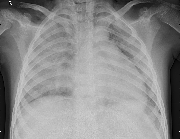

In [122]:
my_image

In [123]:
type(my_image)

PIL.Image.Image

In [124]:
my_image = image.img_to_array(my_image)

In [125]:
type(my_image)

numpy.ndarray

In [126]:
my_image.shape

(139, 180, 3)

In [127]:
my_image = np.expand_dims(my_image, axis=0)

In [128]:
my_image.shape

(1, 139, 180, 3)

In [129]:
(model.predict(my_image) > 0.5).astype('int32')

array([[1]], dtype=int32)

In [130]:
train_image_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [131]:
test_image_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}